In [66]:
import matplotlib.pyplot as plt
from functools import partial

import torch
from torch import nn
from torch import distributions
from DataLoad import *


device = torch.cuda.device(0) if torch.cuda.is_available() else torch.device('cpu')

%matplotlib inline

In [2]:
x = torch.randn(4).cuda()

In [3]:
aug = AugmentGaussianNoise(0.2, 0.5)

In [41]:
aug([x, None])

(tensor([ 1.5410, -0.2934, -2.1788,  0.5684], device='cuda:0'),
 tensor([ 1.9049,  0.2287, -1.6870,  0.7678], device='cuda:0'),
 None)

In [8]:
x, x + torch.Tensor([2.0]).cuda()

(tensor([ 1.5410, -0.2934, -2.1788,  0.5684], device='cuda:0'),
 tensor([ 3.5410,  1.7066, -0.1788,  2.5684], device='cuda:0'))

In [13]:
distro = distributions.Normal(0.2, 0.1)
torch.abs(distro.sample((1, )).cuda() + x)

tensor([1.7007, 0.1338, 2.0191, 0.7281], device='cuda:0')

In [47]:
from librosa.core import pcen
from librosa.display import specshow

In [62]:
from os import path
# d = 'dataset/features'
fn = 'dataset/features/sr44100_win2048_hop511_mels64_nolog/features/YKK227gPpRn4_30.000_40.000.npy'
wav_fn = 'dataset/audio/train/weak/YKK227gPpRn4_30.000_40.000.wav'
# fn = path.join(d, 'YPWG95GjByFQ_140.000_150.000.wav')
assert path.exists(fn), path.exists(wav_fn)

In [68]:
data = np.load(fn)
plot = partial(specshow, x_axis='time', y_axis='mel')

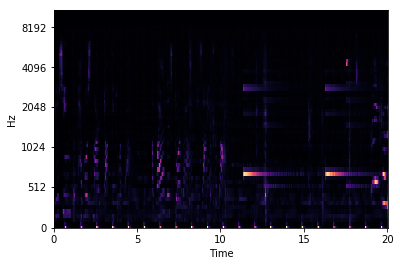

In [70]:
plot(
    data.T
)

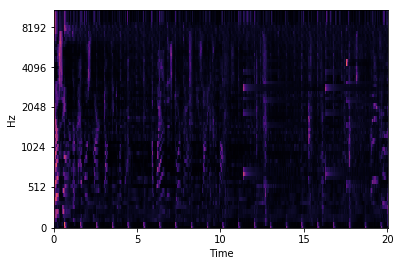

In [67]:
kwargs = {
    'time_constant': 0.5,
    'sr': 44100,
    'hop_length': 511
}
plot(
    pcen(data.T, **kwargs)
)

In [57]:
import IPython.display as ipd

In [63]:
ipd.Audio(wav_fn, rate=44100)

In [86]:
a = pcen(data.T, **kwargs).T
b = pcen(data, axis=0, **kwargs)

In [88]:
np.all(np.isclose(a, b))

True